In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth') 

In [4]:
df_lv = pd.read_csv("lv_PF1_1.csv")
df_el = pd.read_csv("el_PF1_1.csv")

lvPF_Files = ['lv_PF1_1.csv','lv_PF1_2.csv','lv_PF2_1.csv','lv_PF2_2.csv','lv_PF3_1.csv','lv_PF3_2.csv',
            'lv_PF4_1.csv','lv_PF4_2.csv']
elFF_Files = ['el_PF1_1.csv','el_PF1_2.csv','el_PF2_1.csv','el_PF2_2.csv','el_PF3_1.csv','el_PF3_2.csv',
            'el_PF4_1.csv','el_PF4_2.csv']

In [5]:
df_lv.head()

,Task_Name,times,Trial_Nr,variable_name,X,Y,Task_ID
0,SmoothPursuit,1607623212072,1,PF1,854.125872,673.392316,PF1_1
1,SmoothPursuit,1607623212150,1,PF1,924.953241,543.372132,PF1_1
2,SmoothPursuit,1607623212221,1,PF1,853.167000,478.595835,PF1_1
3,SmoothPursuit,1607623212305,1,PF1,753.543077,420.780610,PF1_1
4,SmoothPursuit,1607623212381,1,PF1,798.733721,442.085222,PF1_1


In [6]:
df_el.head()

,X,Y,Time
0,1225.3,245.5,1607623212073
1,1227.7,245.3,1607623212077
2,1229.7,244.8,1607623212081
3,1230.2,244.0,1607623212085
4,1230.2,243.5,1607623212089


In [7]:
df_el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1448 non-null   float64
 1   Y       1448 non-null   float64
 2   Time    1448 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 34.1 KB


In [8]:
df_lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Task_Name      73 non-null     object 
 1   times          73 non-null     int64  
 2   Trial_Nr       73 non-null     int64  
 3   variable_name  73 non-null     object 
 4   X              73 non-null     float64
 5   Y              73 non-null     float64
 6   Task_ID        73 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.1+ KB


In [9]:
# sorting data agianst TimeStamp columns
df_lv.sort_values('times', inplace=True)
df_el.sort_values('Time', inplace=True)
# concatenating the DataFrames 
comp = pd.concat([df_lv.times, df_el.Time], join = 'outer', axis = 1) 

## Comparing Min values of two dataset time column
# comp = comp[['times','Time']].min(axis=1)

minlv = comp.times.min()
minel = comp.Time.min()
maxlv = comp.Time.max()
maxel = comp.times.max()
print(minlv, "and", minel, "are two MIN datastamp points and", 
      maxlv, maxel, "are two MAX datastamp points from two dataframes")

1607623212072.0 and 1607623212073 are two MIN datastamp points and 1607623217861 1607623217863.0 are two MAX datastamp points from two dataframes


In [25]:
# Here you could write the name of the dataframes
# df_lv
# df_el 
def timeVal(df1, df2):
    # sorting data agianst TimeStamp columns
    df1.sort_values('times', inplace=True)
    df2.sort_values('Time', inplace=True)
    # concatenating the DataFrames 
    comp = pd.concat([df1.times, df2.Time], join = 'outer', axis = 1) 

    ## Comparing Min values of two dataset time column
    # comp = comp[['times','Time']].min(axis=1)

    minlv = comp.times.min()
    minel = comp.Time.min()
    maxlv = comp.Time.max()
    maxel = comp.times.max()
#     print(minlv, "and", minel, "are two MIN datastamp points and", 
#       maxlv, maxel, "are two MAX datastamp points from two dataframes")
    # Creating a list
    compMinMax = [['minlv', minlv, 'minel', minel], ['maxlv', maxlv, 'maxel', maxel]]
    # Create the pandas DataFrame 
    compMinMax = pd.DataFrame(compMinMax, columns = ['et_Labvanced', 'TS', 'et_EyeLink', 'TS'])
    print_full(compMinMax)

In [26]:
# lvPF_Files
# elFF_Files
# Loop through the files to see all the time differences
# def nameIter(arr1, arr2):
#     for i in arr1:
#         df1 = pd.read_csv(i)
#         for j in arr2:
#             df2 = pd.read_csv(j)
#             timeVal(df1, df2)
# nameIter(lvPF_Files,elFF_Files)

In [13]:
# For the single dataset
# Creating a list
compMinMax = [['minlv', minlv, 'minel', minel], ['maxlv', maxlv, 'maxel', maxel]]
# Create the pandas DataFrame 
compMinMax = pd.DataFrame(compMinMax, columns = ['et_Labvanced', 'TS', 'et_EyeLink', 'TS']) 
print_full(compMinMax)

  et_Labvanced                   TS et_EyeLink                   TS
0        minlv 1,607,623,212,072.00      minel 1,607,623,212,073.00
1        maxlv 1,607,623,217,861.00      maxel 1,607,623,217,863.00


In [15]:
df_lv['times']

0     1607623212072
1     1607623212150
2     1607623212221
3     1607623212305
4     1607623212381
          ...      
68    1607623217556
69    1607623217621
70    1607623217705
71    1607623217785
72    1607623217863
Name: times, Length: 73, dtype: int64

In [16]:
df_el['Time']

0       1607623212073
1       1607623212077
2       1607623212081
3       1607623212085
4       1607623212089
            ...      
1443    1607623217845
1444    1607623217849
1445    1607623217853
1446    1607623217857
1447    1607623217861
Name: Time, Length: 1448, dtype: int64

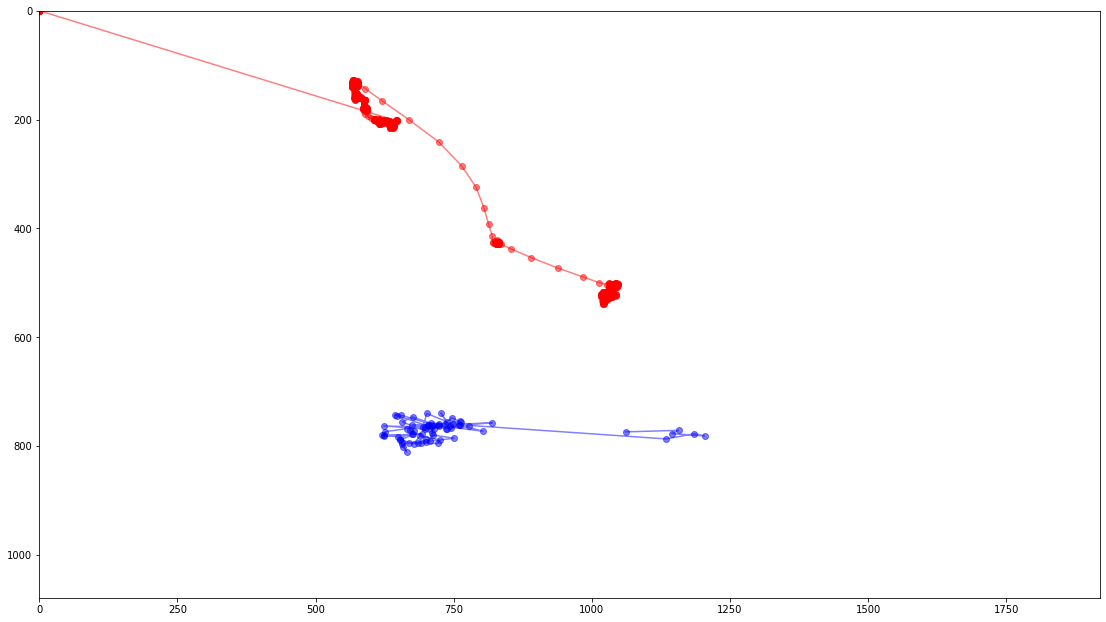

In [16]:
# Plotting ScanPath
plt.figure(figsize=(19, 10.8))
plt.xlim(0, 1919)
plt.ylim(1079, 0)
plt.plot(df_lv.X, df_lv.Y, 'bo-', alpha=.5, label="Labvanced", color="blue");
plt.plot(df_el.X, df_el.Y, 'bo-', alpha=.5, label="EyeLink", color="red");

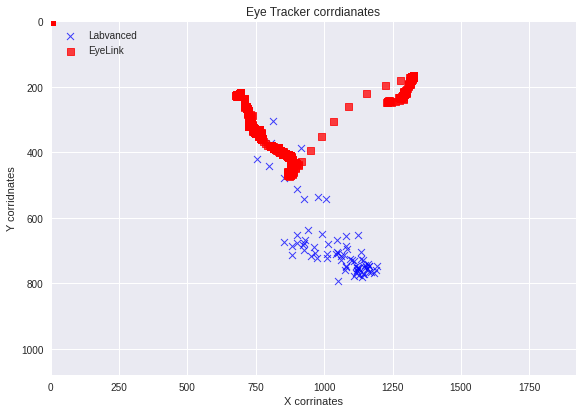

In [98]:
# load the coordinates file from different dataframes
x1 = df_lv.X
y1 = df_lv.Y

x2 = df_el.X
y2 = df_el.Y

# plt.scatter(x, y, cmap='summer', edgecolor='red')
# plt.hist2d(x,y, bins=[np.arange(0,800,5),np.arange(0,450,5)])
plt.scatter(x1,y1, c='b', marker='x', label='Labvanced', linewidth=1, alpha=0.75)
plt.scatter(x2, y2, c='r', marker='s', label='EyeLink', linewidth=1, alpha=0.75)
plt.legend(loc='upper left')

# Plotting Scatter
plt.xlim(0, 1919)
plt.ylim(1079, 0)
plt.tight_layout()

plt.title('Eye Tracker corrdianates')
plt.xlabel('X corrinates')
plt.ylabel('Y corridnates')
plt.style.use('seaborn')
plt.show()


## Plotting X against TimeStamp

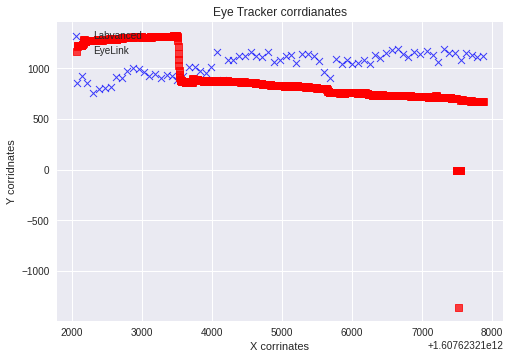

In [23]:
# load the coordinates file from different dataframes
x1 = df_lv.times
y1 = df_lv.X

x2 = df_el.Time
y2 = df_el.X

# plt.scatter(x, y, cmap='summer', edgecolor='red')
# plt.hist2d(x,y, bins=[np.arange(0,800,5),np.arange(0,450,5)])
plt.scatter(x1,y1, c='b', marker='x', label='Labvanced', linewidth=1, alpha=0.75)
plt.scatter(x2, y2, c='r', marker='s', label='EyeLink', linewidth=1, alpha=0.75)
plt.legend(loc='upper left')

# Plotting Scatter
# plt.xlim(0, 1919)
# plt.ylim(1079, 0)
# plt.tight_layout()

plt.title('Eye Tracker corrdianates')
plt.xlabel('X corrinates')
plt.ylabel('Y corridnates')
plt.style.use('seaborn')
plt.show()

## Plotting Y against TimeStamp

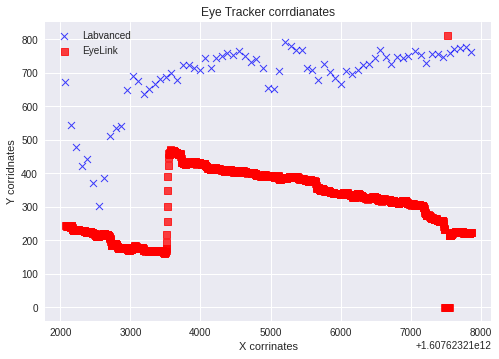

In [24]:
# load the coordinates file from different dataframes
x1 = df_lv.times
y1 = df_lv.Y

x2 = df_el.Time
y2 = df_el.Y

# plt.scatter(x, y, cmap='summer', edgecolor='red')
# plt.hist2d(x,y, bins=[np.arange(0,800,5),np.arange(0,450,5)])
plt.scatter(x1,y1, c='b', marker='x', label='Labvanced', linewidth=1, alpha=0.75)
plt.scatter(x2, y2, c='r', marker='s', label='EyeLink', linewidth=1, alpha=0.75)
plt.legend(loc='upper left')

# Plotting Scatter
# plt.xlim(0, 1919)
# plt.ylim(1079, 0)
# plt.tight_layout()

plt.title('Eye Tracker corrdianates')
plt.xlabel('X corrinates')
plt.ylabel('Y corridnates')
plt.style.use('seaborn')
plt.show()